#Consigna
Identificar un problema de clasificación multiclase de imagenes que puedan resolver utilizando una red neuronal convolucional implementada en Keras utilizando TensorFlow como vimos en clase. Desarrollar un modelo para resolver en un Python Notebook, donde diseñen una red e implementen como adaptar los datos de entrada a una matriz, para pasarla por un modelo creado con Keras. Se pueden apoyar del ejemplo resuelto sobre el dataset de MNIST de clasificación de Digitos en este Notebook

Ademas en el mismo notebook deberán:

1. Explicar el problema a resolver y la solución propuesta
2. Identificar y explicar los conceptos teóricos vistos en clase sobre modelado y entrenamiento de redes neuronales. Tip: visualizar el modelo con algún paquete como keras-visualizer para explicar su comportamiento.
3. Visualizar los datos de entrada, ejemplos tomados del dataset, y algunos ejemplos de salida.

Se puede optar por resolver el problema con el dataset de Fashion MNIST. Este ya viene cargado en Google Colab. Pueden encontrar otros datasets en Kaggle o directamente de internet.

#Consigna 1
El dataset importado de keras contiene imagenes de 28x28, las cuales son imagenes diferentes prendas de ropa. Lo que vamos a hacer con este modelo es que aprenda a identificar prenda de ropa es en base a la foto.

In [2]:
#Importamos las librerias necesarias
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
#Importamos el dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
#Importamos la data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(y_train.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000,) (10000,)


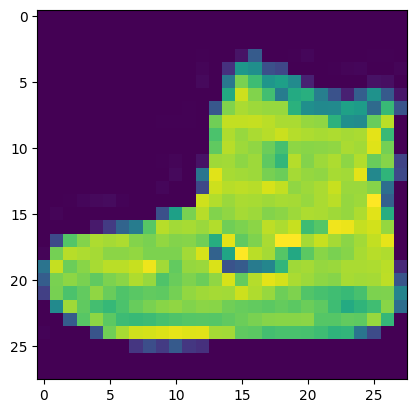

In [5]:
#Ploteamos la primer imagen del dataset
plt.imshow(X_train[0])

In [6]:
#Chequeamos el tamaño de la imagen
X_train[0].shape

(28, 28)

In [16]:
#Chequeamos las dimensiones de los datos de entrenamiento
X_train.shape

(60000, 28, 28, 1)

In [17]:
#Modificamos los datos de entrenamiento para que se ajusten con el modelo
X_train = X_train.reshape(60000,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [18]:
#Chequeamos las dimensiones de los datos de testeo
X_test.shape

(10000, 28, 28, 1)

In [19]:
#Modificamos los datos de testeo para que se ajusten con el modelo
X_test = X_test.reshape(10000,28,28,1)
print(X_test.shape)

(10000, 28, 28, 1)


In [22]:
#Usamos la función de TensorFlow para convertir las etiquetas de entrenamiento a one_hot encodign, y luego hacemos lo mismo con las de testeo
y_train_onehot = tf.one_hot(y_train, depth=10)
y_test_onehot = tf.one_hot(y_test, depth=10)
print("y_train[0]:", y_train[0])
print("y_train_onehot[0]:", y_train_onehot[0])

y_train[0]: 9
y_train_onehot[0]: tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


In [55]:
#Parámetros del modelo
num_filters = 8 #Cantidad de filtros en la capa de convolución
filter_size = 3 #Tamaño del filtro para la capa convolucional
pool_size = 2 #Tamaño de la ventana para la capa de max-pooling

#Definición del modelo secuencial
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # La forma de la imagen es 28x28x1 (escala de grises)
    #Primera capa convolucional
    tf.keras.layers.Conv2D(
        filters=num_filters, #Aplicamos 8 filtros para extraer características
        kernel_size=filter_size,#Cada filtro es de tamaño 3x3
        activation='relu', #Utilizamos la activación ReLU
    ),
    #Capa de max-pooling
    tf.keras.layers.MaxPooling2D(
        pool_size=pool_size #Reducimos la dimensionalidad con una ventana de 2x2
    ),

    #Capa de Flatten
    tf.keras.layers.Flatten(), #Convertimos la salida 2D de la capa convolucional en un vector 1D

    # Primera capa densa (completamente conectada)
    tf.keras.layers.Dense(
        128, #Tiene 128 neuronas
        activation='relu' #Usamos la activación ReLU
    ),

    # Capa de salida
    tf.keras.layers.Dense(
        10, #Tiene 10 neuronas (una por clase en fashion_mnist)
        activation='softmax' #Softmax para obtener probabilidades para cada clase
    )
])


In [56]:
#Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
#Entrenamos el modelo
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9345 - loss: 0.1731 - val_accuracy: 0.8894 - val_loss: 0.3803
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9414 - loss: 0.1543 - val_accuracy: 0.8851 - val_loss: 0.4085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9457 - loss: 0.1440 - val_accuracy: 0.8912 - val_loss: 0.4440
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9499 - loss: 0.1349 - val_accuracy: 0.8909 - val_loss: 0.4287
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9544 - loss: 0.1237 - val_accuracy: 0.8919 - val_loss: 0.4501


In [63]:
history.history

{'accuracy': [0.9340999722480774,
  0.9386166930198669,
  0.9435999989509583,
  0.9472000002861023,
  0.9509833455085754],
 'loss': [0.1763143688440323,
  0.1612866371870041,
  0.1528957486152649,
  0.1419583261013031,
  0.13303358852863312],
 'val_accuracy': [0.8894000053405762,
  0.8851000070571899,
  0.8912000060081482,
  0.8909000158309937,
  0.8919000029563904],
 'val_loss': [0.38029998540878296,
  0.40850895643234253,
  0.4439600706100464,
  0.42874813079833984,
  0.4501344859600067]}

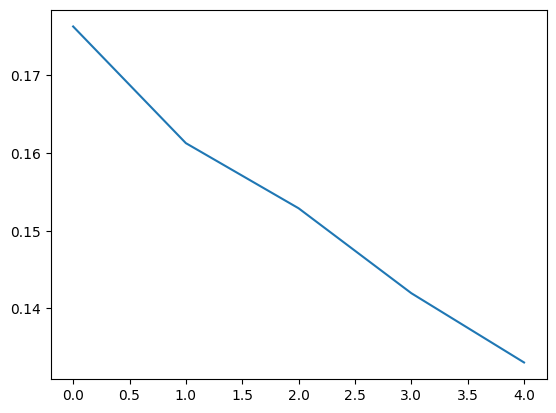

In [74]:
#Grafico de la evolución del loss durante el entrenamiento en los epochs.
plt.plot(history.history['loss'])

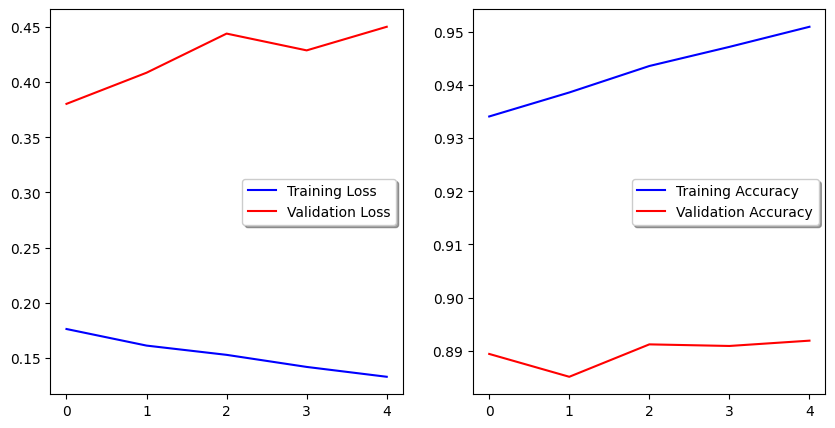

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [76]:
#Predecimos todas las imagenes del dataset
pred_probs = model.predict(X_test)
pred_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.5044731e-20, 1.8806460e-21, 9.2190471e-22, ..., 1.6763868e-09,
        1.9097266e-17, 9.9999994e-01],
       [1.6546318e-04, 2.2574308e-21, 9.9983454e-01, ..., 2.6492284e-30,
        9.6718982e-15, 5.6397265e-27],
       [4.3338286e-34, 9.9999994e-01, 0.0000000e+00, ..., 4.9110002e-35,
        8.7702276e-32, 0.0000000e+00],
       ...,
       [2.4417738e-19, 6.2698122e-23, 1.6283576e-22, ..., 5.0239045e-24,
        9.9999994e-01, 2.8170427e-20],
       [3.9227759e-35, 9.9999994e-01, 0.0000000e+00, ..., 4.3245949e-35,
        1.3590211e-26, 0.0000000e+00],
       [2.1133274e-06, 3.8098747e-06, 3.0004461e-08, ..., 2.1304218e-03,
        3.1431172e-02, 2.4438594e-03]], dtype=float32)

In [77]:
#Para cada imagen, buscamos la etiqueta con mayor probabilidad.
pred_classes = np.argmax(pred_probs,axis=1)

In [78]:
#Mostramos las etiquetas
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)